# csv 파일 불러오기, DataFrame 생성

파일명: 제품명_modeling.csv 데이터 불러오기
* csv 파일은 작업 상태인 리뷰 중 카테고리가 빈 것은 제거 후 가져온다.

In [200]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
import pandas as pd
import re
import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_rows', 30) # row 생략 없이 출력
pd.set_option('display.max_columns', 30) # col 생략 없이 출력

In [202]:
#청소기
# path = "/content/drive/MyDrive/lg_modeling/cleaner_modeling.csv"
#냉장고
#path = "/content/drive/MyDrive/lg_modeling/refrigerator_modeling.csv"
#식세기
path = "/content/drive/MyDrive/lg_modeling/dishwasher_modeling.csv"

data = pd.read_csv(path, sep=',', encoding = 'utf-8')
data.rename(columns={'리뷰 번호' : 'Review_Num', 
                    '리뷰 원문' : 'Original_Comment',
                    '카테고리' : 'Category'}, inplace=True)
data['Category'] = data['Category'].str.split('and')
print(data.shape)
data.tail(20)

(4127, 3)


,Review_Num,Original_Comment,Category
4107,66072,매직 5년 사용하다 이번에 LG로 바꿨는데 훨씬 조용해서 좋고 많이 들어가 좋습니다,[소음]
4108,66075,식기세척기 알아보고 있는중인데요 12인용은 아스콘 냄새가 난다는 평이 있어서요 혹시...,[위생]
4109,66084,세척도 잘되고 디자인도 예뻐요,[디자인]
4110,66086,식기세척기 설치형무설치형 있는데 되게 고민많이했네요 그래도 설치형이 더깨끗할거 같아...,"[디자인, 기타]"
4111,66101,공간작업하시면 비용들어가요 작업먼저하신후 세척기설치 하셔야 해요 공간작업비는 기본 ...,[소음]
4112,66105,하루에 한번 에서 두번 사용해요 안에 들어갔다 다온그릇은 반짝 빛나요 대만족하고 사...,"[디자인, 디자인]"
4113,66136,저는 이사오기전에엘지 썻는데 고무 타는냄새 가 마니나더라구요 이번에는지멘스에서 햇는...,[위생]
4114,66138,윗부분에 공기를 아예 엎어서 씻을수 있어서 잘 닦이고 맘에 듭니다 예전에 쓰던 타사...,[소음]
4115,66148,저도 고민 많이 했거든요 나이 먹으니 허리 구부리는게 엄청 불편해서요 근데 레테에서...,[동작편리성]
4116,66152,근데 소음이 마음에 안드네요 생각보다 더시끄러워요 근데 설겆이는 뽀송뽀송 아주 잘되...,[소음]


In [203]:
#####---- NaN값 제거 ----#####
data = data.dropna(axis=0, how='any')
data = data.reset_index(drop=True)
data.isna().sum()

Review_Num          0
Original_Comment    0
Category            0
dtype: int64

In [204]:
#####---- 중복 제거 ----#####
all_categorys = []
for i in range(len(data)):
  data['Category'][i] = list(set(data['Category'][i]))
  all_categorys += data['Category'][i]
print(data.shape)
data.tail(20)

(4127, 3)


,Review_Num,Original_Comment,Category
4107,66072,매직 5년 사용하다 이번에 LG로 바꿨는데 훨씬 조용해서 좋고 많이 들어가 좋습니다,[소음]
4108,66075,식기세척기 알아보고 있는중인데요 12인용은 아스콘 냄새가 난다는 평이 있어서요 혹시...,[위생]
4109,66084,세척도 잘되고 디자인도 예뻐요,[디자인]
4110,66086,식기세척기 설치형무설치형 있는데 되게 고민많이했네요 그래도 설치형이 더깨끗할거 같아...,"[디자인, 기타]"
4111,66101,공간작업하시면 비용들어가요 작업먼저하신후 세척기설치 하셔야 해요 공간작업비는 기본 ...,[소음]
4112,66105,하루에 한번 에서 두번 사용해요 안에 들어갔다 다온그릇은 반짝 빛나요 대만족하고 사...,[디자인]
4113,66136,저는 이사오기전에엘지 썻는데 고무 타는냄새 가 마니나더라구요 이번에는지멘스에서 햇는...,[위생]
4114,66138,윗부분에 공기를 아예 엎어서 씻을수 있어서 잘 닦이고 맘에 듭니다 예전에 쓰던 타사...,[소음]
4115,66148,저도 고민 많이 했거든요 나이 먹으니 허리 구부리는게 엄청 불편해서요 근데 레테에서...,[동작편리성]
4116,66152,근데 소음이 마음에 안드네요 생각보다 더시끄러워요 근데 설겆이는 뽀송뽀송 아주 잘되...,[소음]


# 리뷰 전처리

### 불필요한 문자열 제거 (리뷰 원문 전처리)

In [205]:
# html태그 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'<[^>]*>', repl=r'', regex=True)

# email 주소 제거
data['Original_Comment']=data['Original_Comment'].str.replace(pat=r'(\[a-zA-Z0-9\_.+-\]+@\[a-zA-Z0-9-\]+.\[a-zA-Z0-9-.\]+)', 
                                             repl=r'', regex=True)

# _제거
data['Original_Comment']=data['Original_Comment'].str.replace('_', '')

# \r, \n 제거
data['Original_Comment']=data['Original_Comment'].str.replace(pat=r'[\r|\n]', repl=r'', regex=True)

# url 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*',repl=r'', regex=True)

# 자음, 모음 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'([ㄱ-ㅎㅏ-ㅣ]+)', repl=r'', regex=True)

# 특수 기호 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'[^\w\s]', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace('1n', '')
data['Original_Comment'] = data['Original_Comment'].str.replace('_', '')

# 모두 영어인 행 공백으로 대체
data['Original_Comment'] =data['Original_Comment'].str.replace(pat=r'^[a-zA-Z\s]+$', repl=r'', regex=True)

# 모두 숫자인 행 공백으로 대체
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'^[0-9\s]+$', repl=r'', regex=True)

# 좌우 공백 제거
data['Original_Comment']= data['Original_Comment'].str.strip()

# 아이디 관련 단어 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'ID\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'아이디\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'id\s', repl=r'', regex=True)

# 주문번호 관련 단어 제거
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매\s번호\s[a-zA-Z0-9]+', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'주문\s번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'결제\s번호\s', repl=r'', regex=True)
data['Original_Comment'] = data['Original_Comment'].str.replace(pat=r'구매\s번호\s', repl=r'', regex=True)

In [206]:
data.head(10)

,Review_Num,Original_Comment,Category
0,24635,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,[위생]
1,24636,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,[위생]
2,24640,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,[사운드]
3,24641,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,[위생]
4,24642,저희도 안그런데 문열리고 끝난소리나요,[사운드]
5,24661,요즘 식세기들 점점 비싸지는데 왜 그런걸까여23시간 돌리는데 제대로 안마르고요그릇 ...,[위생]
6,24662,열리고 뜨거운 김 빠지고 난 뒤에 종료음 들려요 십몇분까진 아닌것 같은데 지켜본적이...,[사운드]
7,24691,문 열리고 12분 정도 뒤에 종료음 들려요 몇십분은 아니던뎅,[사운드]
8,24762,사고나서 매일 한번씩 돌려봤습니다 3인 가정인데 설거지 안 하니까 저녁이 너무 평화...,[위생]
9,24770,좋아요 이뻐요 잘세척되요,[디자인]


# 데이터 증강하기
1. konlpy의 조사 제거 모듈 사용하여 조사 없는 데이터 생성(참고 자료 : https://cd-programming.tistory.com/215)
2. textaugment 라이브러리 사용하여 20% 삭제하거나 일부분 shuffle하게 만들었음(참고 자료 : https://github.com/dsfsi/textaugment.git)


In [207]:
##### ---- 300개 이하인 데이터만 추출(기준은 언제든지 바꿔도 됨!) ---- #####
import collections
category_counts = dict(collections.Counter(all_categorys))
category_plus = []
for i in category_counts:
  if category_counts[i] <= 300:
    category_plus.append(i)
print(category_counts)
print(category_plus)

review_number, review_original, review_category = [], [], []
for i in range(len(data['Category'])):
  for k in data['Category'][i]:
    if k in category_plus:
      review_number.append(data['Review_Num'][i])
      review_original.append(data['Original_Comment'][i])
      review_category.append(data['Category'][i])
      break
under_300 = pd.DataFrame({'Review_Num':review_number, 'Original_Comment':review_original, 'Category':review_category})
under_300.shape

{'위생': 996, '사운드': 47, '디자인': 1685, '소음': 1001, '시인성가독성': 58, '기타': 167, '동작편리성': 204, '유지관리': 84, '공간효율성': 209, '조작편리성': 60, '정보성': 83, '조립성': 6, '안전성': 29, '촉감': 4, '견고성': 49}
['사운드', '시인성가독성', '기타', '동작편리성', '유지관리', '공간효율성', '조작편리성', '정보성', '조립성', '안전성', '촉감', '견고성']


(927, 3)

In [208]:
!pip install numpy nltk gensim textblob googletrans
!pip install textaugment
!pip install tqdm
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [209]:
from konlpy.tag import Okt  

def josa_deletion(sentence):
	tagged_sentences =[]
	sentences = []
	pos_tags = []
	tokenizer = Okt()
	temp_X = tokenizer.pos(sentence)
	tagged_sentences.append(temp_X)

	for tagged_sentence in tagged_sentences:
		sentence, tag_info = zip(*tagged_sentence)
		sentences.append(list(sentence))
		pos_tags.append(list(tag_info))
	sentences = sentences[0]
	pos_tags = pos_tags[0]

	idx = [ i for i, value in enumerate(pos_tags) if "Josa" in value]

	if len(idx) != 0:
		for n in idx:
			sentences[n]= None

		new_sentence= list(filter(None, sentences))

		new_sen = ""
		for i in new_sentence:
			new_sen = new_sen + " " + i
	else:
		new_sen = ""

	return new_sen

In [210]:
from tqdm import tqdm_notebook
from textaugment import EDA
import nltk
nltk.download('stopwords')
t = EDA()
review_number, review_original, review_category = [], [], []

for i in tqdm_notebook(range(len(under_300))):

  # 조사 제거하는 모듈
  review_number.append(under_300['Review_Num'][i])
  review_original.append(josa_deletion(under_300['Original_Comment'][i]))
  review_category.append(under_300['Category'][i])

  # 문장에서 20%만 삭제하는 모듈
  temp = t.random_deletion(under_300['Original_Comment'][i], p=0.2)
  review_number.append(under_300['Review_Num'][i])
  review_original.append(temp)
  review_category.append(under_300['Category'][i])

  # 문장에서 1번, 2번, 3번, 4번 셔플하는 모듈
  for k in range(4):
    temp = t.random_swap(under_300['Original_Comment'][i], n=k+1)
    review_number.append(under_300['Review_Num'][i])
    review_original.append(temp)
    review_category.append(under_300['Category'][i])
data_plus = pd.DataFrame({'Review_Num':review_number, 'Original_Comment':review_original, 'Category':review_category})
result_data = data.append(data_plus, ignore_index = True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/927 [00:00<?, ?it/s]

In [211]:
print('증강 대상 데이터 개수 : ', under_300.shape, "증강 후 데이터 개수 : ", data_plus.shape)
print('원래 데이터 개수: ', data.shape, '증강 후 데이터 개수: ', result_data.shape)
result_data.tail(20)

증강 대상 데이터 개수 :  (927, 3) 증강 후 데이터 개수 :  (5562, 3)
원래 데이터 개수:  (4127, 3) 증강 후 데이터 개수:  (9689, 3)


,Review_Num,Original_Comment,Category
9669,66026,자동문열림 기능 너무 편해요이거 없었음 신경 쓰여서 거 식세기 자주 안 돌렸을 필수...,[동작편리성]
9670,66026,건조해도 기능 너무 후 돌렸을 신경 쓰여서 지금처럼 식세기 자주 안 없었음 편해요이...,[동작편리성]
9671,66086,식기세척기 설치 형 무 설치 형 있는데 되게 고민 많이 했네요 그래도 설치 형 더...,"[디자인, 기타]"
9672,66086,식기세척기 설치형무설치형 되게 고민많이했네요 그래도 설치형이 더깨끗할거 같아서 설치...,"[디자인, 기타]"
9673,66086,식기세척기 설치형무설치형 있는데 표준세척이1시간40분 고민많이했네요 그래도 설치형이...,"[디자인, 기타]"
9674,66086,식기세척기 설치형무설치형 있는데 되게 고민많이했네요 그래도 설치형이 더깨끗할거 같아...,"[디자인, 기타]"
9675,66086,식기세척기 설치형무설치형 있는데 좋은것 시간이 그래도 세척 더깨끗할거 같아서 설치형...,"[디자인, 기타]"
9676,66086,식기세척기 설치형무설치형 디자인은 되게 고민많이했네요 같음 한번 더깨끗할거 같아서 ...,"[디자인, 기타]"
9677,66148,저 고민 많이 했거든요 나이 먹으니 허리 구부리는게 엄청 불편해서요 근데 레테 거...,[동작편리성]
9678,66148,저도 고민 많이 나이 허리 엄청 불편해서요 레테에서는 거의 젏은 사람들이여서 불편은...,[동작편리성]


# 새로운 DataFrame 생성 (해당하는 제품군에 맞게 선택)- 해당하는 제품군만 실행

In [212]:
new_df = pd.DataFrame({"original_comment": result_data['Original_Comment'], "category":result_data['Category']})

In [213]:
# #청소기에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['그립감']=0
# new_df['청소가능영역']=0
# new_df['무게']=0
# new_df['촉감']=0
# new_df['핸들링']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['흡입력']=0
# new_df['배터리']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [214]:
# #냉장고에 해당하는 카테고리를 열에 추가
# new_df['소음']=0
# new_df['사운드']=0
# new_df['위생']=0
# new_df['디자인']=0
# new_df['조명']=0
# new_df['촉감']=0
# new_df['동작편리성']=0
# new_df['조작편리성']=0
# new_df['공간효율성']=0
# new_df['조립성']=0
# new_df['유지관리']=0
# new_df['정보성']=0
# new_df['견고성']=0
# new_df['안전성']=0
# new_df['시인성가독성']=0
# new_df['기타']=0

In [215]:
#식세기에 해당하는 카테고리를 열에 추가
new_df['소음']=0
new_df['사운드']=0
new_df['위생']=0
new_df['디자인']=0
new_df['촉감']=0
new_df['동작편리성']=0
new_df['조작편리성']=0
new_df['공간효율성']=0
new_df['조립성']=0
new_df['유지관리']=0
new_df['정보성']=0
new_df['견고성']=0
new_df['안전성']=0
new_df['시인성가독성']=0
new_df['기타']=0

In [216]:
new_df

,original_comment,category,소음,사운드,위생,디자인,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,[위생],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,[위생],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,[사운드],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,[위생],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,[사운드],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,디자인이 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따로 있어 배송 비교적 ...,"[디자인, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9685,우선 디자인이 사용법 마음에 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따로...,"[디자인, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9686,우선 디자인이 깔끔해서 마음에 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따...,"[디자인, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9687,수납공간 디자인이 깔끔해서 마음에 들어요 우선 넉넉하고 숟가락 젓가락 놓는 공간 따...,"[디자인, 공간효율성]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 각 리뷰에 해당하는 카테고리의 값을 1로 변경
### ex) [디자인, 동작편리성] -> 디자인 1, 동작편리성 1, 그 외 0

In [217]:
length=len(new_df)

for i in range(length):
    new_df.category[i]
    for l in new_df.category[i]:
        new_df[l][i] = 1

In [218]:
new_df

,original_comment,category,소음,사운드,위생,디자인,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,[사운드],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,[위생],0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,[사운드],0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,디자인이 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따로 있어 배송 비교적 ...,"[디자인, 공간효율성]",0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9685,우선 디자인이 사용법 마음에 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따로...,"[디자인, 공간효율성]",0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9686,우선 디자인이 깔끔해서 마음에 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따...,"[디자인, 공간효율성]",0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9687,수납공간 디자인이 깔끔해서 마음에 들어요 우선 넉넉하고 숟가락 젓가락 놓는 공간 따...,"[디자인, 공간효율성]",0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [219]:
new_df = new_df.drop(columns=['category'])
new_df

,original_comment,소음,사운드,위생,디자인,촉감,동작편리성,조작편리성,공간효율성,조립성,유지관리,정보성,견고성,안전성,시인성가독성,기타
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,디자인이 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따로 있어 배송 비교적 ...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9685,우선 디자인이 사용법 마음에 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따로...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9686,우선 디자인이 깔끔해서 마음에 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9687,수납공간 디자인이 깔끔해서 마음에 들어요 우선 넉넉하고 숟가락 젓가락 놓는 공간 따...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


### 효율적인 코드 실행을 위해 한글로 되있는 열 이름을 영어로 변경

In [220]:
# #청소기
# new_df.rename(columns={'소음':'noise'}, inplace=True)
# new_df.rename(columns={'사운드':'sound'}, inplace=True)
# new_df.rename(columns={'위생':'hygienic'}, inplace=True)
# new_df.rename(columns={'디자인':'design'}, inplace=True)
# new_df.rename(columns={'그립감':'grip'}, inplace=True)
# new_df.rename(columns={'청소가능영역':'cleanablearea'}, inplace=True)
# new_df.rename(columns={'무게':'weight'}, inplace=True)
# new_df.rename(columns={'촉감':'touch'}, inplace=True)
# new_df.rename(columns={'핸들링':'handling'}, inplace=True)
# new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
# new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
# new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
# new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
# new_df.rename(columns={'정보성':'information'}, inplace=True)
# new_df.rename(columns={'흡입력':'power'}, inplace=True)
# new_df.rename(columns={'배터리':'battery'}, inplace=True)
# new_df.rename(columns={'견고성':'solidity'}, inplace=True)
# new_df.rename(columns={'안전성':'safety'}, inplace=True)
# new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
# new_df.rename(columns={'기타':'etc'}, inplace=True)

# new_df

In [221]:
# #냉장고
# new_df.rename(columns={'소음':'noise'}, inplace=True)
# new_df.rename(columns={'사운드':'sound'}, inplace=True)
# new_df.rename(columns={'위생':'hygienic'}, inplace=True)
# new_df.rename(columns={'디자인':'design'}, inplace=True)
# new_df.rename(columns={'조명':'light'}, inplace=True)
# new_df.rename(columns={'촉감':'touch'}, inplace=True)
# new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
# new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
# new_df.rename(columns={'공간효율성':'space'}, inplace=True)
# new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
# new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
# new_df.rename(columns={'정보성':'information'}, inplace=True)
# new_df.rename(columns={'견고성':'solidity'}, inplace=True)
# new_df.rename(columns={'안전성':'safety'}, inplace=True)
# new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
# new_df.rename(columns={'기타':'etc'}, inplace=True)

# new_df

In [222]:
# 식세기

new_df.rename(columns={'소음':'noise'}, inplace=True)
new_df.rename(columns={'사운드':'sound'}, inplace=True)
new_df.rename(columns={'위생':'hygienic'}, inplace=True)
new_df.rename(columns={'디자인':'design'}, inplace=True)
new_df.rename(columns={'촉감':'touch'}, inplace=True)
new_df.rename(columns={'동작편리성':'movement'}, inplace=True)
new_df.rename(columns={'조작편리성':'operation'}, inplace=True)
new_df.rename(columns={'공간효율성':'spaceefficiency'}, inplace=True)
new_df.rename(columns={'조립성':'ssembly'}, inplace=True)
new_df.rename(columns={'유지관리':'maintenance'}, inplace=True)
new_df.rename(columns={'정보성':'information'}, inplace=True)
new_df.rename(columns={'견고성':'solidity'}, inplace=True)
new_df.rename(columns={'안전성':'safety'}, inplace=True)
new_df.rename(columns={'시인성가독성':'visibility'}, inplace=True)
new_df.rename(columns={'기타':'etc'}, inplace=True)

new_df

,original_comment,noise,sound,hygienic,design,touch,movement,operation,spaceefficiency,ssembly,maintenance,information,solidity,safety,visibility,etc
0,하얀물방울 많이 생기네요 식기세척기 하고 나서 건조안시키고 물로 한번 헹궈내고 자...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,테트리스도 잘 쌓아야 하고 흥건하지 않고 물기 살짝 맺힐 정도 그릇재질에 따라 다르...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,다끝나면 열리던데요종료응 1분전에전 종료음 시끄러워서 읍앴다는,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,물 젖어서 나와요 전 고온건조 돌리는 전기세도 아깝고 어차피 다 돌리고나서는 완전 ...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,저희도 안그런데 문열리고 끝난소리나요,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,디자인이 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따로 있어 배송 비교적 ...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9685,우선 디자인이 사용법 마음에 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따로...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9686,우선 디자인이 깔끔해서 마음에 들어요 수납공간 넉넉하고 숟가락 젓가락 놓는 공간 따...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
9687,수납공간 디자인이 깔끔해서 마음에 들어요 우선 넉넉하고 숟가락 젓가락 놓는 공간 따...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


# [NLP] 코랩에 konlpy 설치 후 okt 사용해보기 (이 코드에서는 사용 x -> 혹시 나중에 사용할 수도 있기 때문에 설치방법만 보기)

In [223]:
# # bash 셸로 명령어 입력하여 라이브러리 설치하기

# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [224]:
# # JAVA_HOME 환경변수 설정하기

# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [225]:
# # 형태소
# print("okt.morphs : ", okt.morphs('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 명사
# print("okt.nouns : ", okt.nouns('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# # 형태소 + 품사
# print("okt.pos : ", okt.pos('흰색이라 깨끗하고 예뻐요기다린 보람 있네요잘 쓰겠습니다'))

# 토큰화 패키지 customized KoNLPy 사용
# 설명 https://wikidocs.net/44249 참고

In [226]:
!pip install customized_konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 잘못 토큰화될 가능성이 높은 일부 단어들을, customized KoNLPy를 통해 토큰으로 직접 지정

In [227]:
from ckonlpy.tag import Twitter

twi = Twitter()

words = [('디자인','Noun')]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

### 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 text_token에 저장

In [228]:
stopwords = ['의', '가', '이', '은', '들', '는', '과', '도', '를', '으로', '에',
             '하다', '을', '이다', '것', '로', '에서', '그', '인', '서', '네요',
             '임', '랑', '게', '요', '에게', '엔']

text_token = []
for sentence in new_df['original_comment']:
    tmp = []
    tmp = twi.morphs(str(sentence), stem=True, norm=True)  #토큰화
    tmp = [word for word in tmp if not word in stopwords]  #불용어 제거
    text_token.append(tmp)

In [229]:
print(text_token[:3])

[['하얗다', '물방울', '많이', '생기', '네', '식기세척기', '하고', '나서다', '건조', '안시', '키', '고', '물', '한번', '헹궈내', '고', '자연', '건조', '덜', '그렇다', '에요'], ['테트리스', '자다', '쌓다', '아야', '하고', '흥건', '하', '지', '않다', '물기', '살짝', '맺다', '힐', '정도', '그릇', '재질', '따르다', '다르다', '기도', '한데', '유리', '도자기', '류', '다', '자다', '말', '라서', '나오다', '편이', '에요', '엘지', '빌트', '쓰다', '있다', '린스', '포함', '되다', '달리', '올인원', '세제', '넣다', '1', '시간', '반', '작동', '해', '작동', '후', '에는', '바로', '안', '꺼내다', '한참', '후', '정리'], ['다', '끝나다', '열리다', '던데', '종료', '응', '1', '분전', '에전', '종료', '음', '시끄럽다', '읍앴다']]


### 정수 인코딩 - 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩을 수행. 우선, 훈련 데이터에 대해서 단어 집합(vocaburary)을 만들기

In [230]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_token)

### 아래 결과를 보면단어가 9900개가 넘게 존재. 각 정수는 전체 훈련 데이터에서 등장 빈도수가 높은 순서대로 부여되었기 때문에, 높은 정수가 부여된 단어들은 등장 빈도수가 매우 낮다는 것을 의미.

In [231]:
print(tokenizer.word_index)

{'있다': 1, '어요': 2, '좋다': 3, '되다': 4, '보다': 5, '설치': 6, '같다': 7, '하고': 8, '자다': 9, '고': 10, '없다': 11, '들다': 12, '세척': 13, '사용': 14, '안': 15, '저': 16, '다': 17, '넣다': 18, '너무': 19, '해': 20, '문': 21, '쓰다': 22, '식': 23, '시간': 24, '세기': 25, '어서': 26, '그릇': 27, '식기세척기': 28, '한': 29, '않다': 30, '해서': 31, '더': 32, '설거지': 33, '님': 34, '건조': 35, '소음': 36, '세제': 37, '많이': 38, '지만': 39, '돌리다': 40, '기사': 41, '엘지': 42, '때': 43, '열': 44, '자동': 45, '만족': 46, '기능': 47, '만': 48, '생각': 49, '크다': 50, '제품': 51, '받다': 52, '전': 53, '정도': 54, '써다': 55, '좀': 56, '거': 57, '나': 58, '인용': 59, '끄다': 60, '하': 61, 'lg': 62, '구매': 63, '니': 64, '물': 65, '후': 66, '림': 67, '면': 68, '해주': 69, '되어다': 70, '열리다': 71, '정말': 72, '넘다': 73, '어가': 74, '네': 75, '수': 76, '까지': 77, '배송': 78, '히': 79, '사다': 80, '나오다': 81, '잘': 82, '린스': 83, '스팀': 84, '디자인': 85, '소리': 86, '제': 87, '오다': 88, '가다': 89, '싱크대': 90, '편하다': 91, '라': 92, '그렇다': 93, '안되다': 94, '이라': 95, '고요': 96, '고민': 97, '걸리다': 98, '한번': 99, '1': 100, '빌트': 101, '데': 102, '끝

### 빈도수가 낮은 단어들은 자연어 처리에서 배제. 등장 빈도수가 2회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인

### 아래 코드 결과: 등장 빈도가 threshold 값인 2회 미만. 즉, 1회 이하인 단어들은 단어 집합에서 무려 절반 이상을 차지. 하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 1.30%밖에 되지 않습니다. 아무래도 등장 빈도가 1회 이하인 단어들은 자연어 처리에서 별로 중요하지 않을 듯 함. 그래서 이 단어들은 정수 인코딩 과정에서 배제시킴

In [232]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 7882
등장 빈도가 1번 이하인 희귀 단어의 수: 2200
단어 집합에서 희귀 단어의 비율: 27.911697538695762
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.5777766105523019


### 등장 빈도수가 1이하인 단어들의 수를 제외한 단어의 개수를 단어 집합의 최대 크기로 제한

In [233]:
# 전체 단어 개수 중 빈도수 1이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 5683


### 케라스 토크나이저의 인자로 넘겨주고 텍스트 시퀀스를 정수 시퀀스로 변환

In [234]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(text_token)

X = tokenizer.texts_to_sequences(text_token)
print('리뷰의 최대 길이 :',max(len(l) for l in X))
print('리뷰의 평균 길이 :',sum(map(len, X))/len(X))

리뷰의 최대 길이 : 386
리뷰의 평균 길이 : 39.0721436680772


In [235]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

max_len = 120
below_threshold_len(max_len, X)
#문장 길이가 120로 할 경우, 약 97%의 대부분의 샘플을 커버 가능

전체 샘플 중 길이가 120 이하인 샘플의 비율: 94.86015068634534


### 각 리뷰 샘플들에 대해 패딩을 진행

In [236]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = pad_sequences(X, maxlen = max_len)
X

array([[   0,    0,    0, ...,  510,   93,  311],
       [   0,    0,    0, ..., 1287,   66,  493],
       [   0,    0,    0, ...,  269,  784, 3473],
       ...,
       [   0,    0,    0, ...,   40,  376,   46],
       [   0,    0,    0, ...,   40,  376,   46],
       [   0,    0,    0, ...,   40,  376,   46]], dtype=int32)

### 16개 카테고리이기 때문에 y에는 16개의 label이 들어가도록 설정

In [237]:
import numpy as np
#청소기
# y = np.array(new_df.iloc[:, 1:21])
# y

#냉장고
# y = np.array(new_df.iloc[:, 1:17])
# y

#식세기
y = np.array(new_df.iloc[:, 1:16])
y

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### 모델링을 위해 train, test set 분리

In [238]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = np.array(X_train)
X_test = np.array(X_test)

print(len(X_train))
print(len(X_test))

7751
1938


# 모델링 - GRU를 이용한 Multi-label 아키텍처를 이용하여 모델링을 진행

In [239]:
import tensorflow.keras.backend as K

def F1score(y_true, y_pred):
    eps = K.epsilon()
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    real_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    pred_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    recall = true_positives / (real_positives + eps)
    precision = true_positives / (pred_positives + eps)
    f1_score = 2 * (recall * precision) / (recall + precision + eps)
    return f1_score

In [240]:
#청소기
# label_names = new_df.columns[1:21] #label 종류
#냉장고
# label_names = new_df.columns[1:17] #label 종류
#식세기
label_names = new_df.columns[1:16] #label 종류
n_label = len(label_names)

y_train_list = {label_names[i]:y_train[:,i] for i in range(n_label)}
y_test_list = {label_names[i]:y_test[:,i] for i in range(n_label)}

y_train_list

{'noise': array([0, 0, 0, ..., 0, 0, 0]),
 'sound': array([0, 0, 0, ..., 0, 0, 0]),
 'hygienic': array([0, 0, 0, ..., 0, 0, 0]),
 'design': array([0, 1, 1, ..., 0, 1, 0]),
 'touch': array([0, 0, 0, ..., 0, 0, 0]),
 'movement': array([1, 0, 0, ..., 1, 0, 0]),
 'operation': array([0, 0, 0, ..., 0, 0, 0]),
 'spaceefficiency': array([0, 0, 0, ..., 0, 0, 1]),
 'ssembly': array([0, 0, 0, ..., 0, 0, 0]),
 'maintenance': array([0, 0, 0, ..., 0, 0, 0]),
 'information': array([0, 0, 0, ..., 0, 0, 0]),
 'solidity': array([0, 0, 0, ..., 0, 0, 0]),
 'safety': array([0, 0, 0, ..., 0, 0, 0]),
 'visibility': array([0, 0, 1, ..., 0, 0, 0]),
 'etc': array([0, 0, 0, ..., 0, 0, 0])}

In [241]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Embedding, Dense, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [242]:
def SimpleGRU():
    input_layer = Input(shape=(max_len,))
    embedding_text = Embedding(vocab_size, 256)(input_layer)
    x = GRU(128)(embedding_text)
    x = Dropout(0.5)(x)
    output_layers = [Dense(1, activation="sigmoid", name=label_names[i])(x) for i in range(y.shape[1])]

    model = Model(inputs=input_layer, outputs=output_layers)
    model.compile(loss=['binary_crossentropy']*n_label, optimizer='rmsprop', metrics=[F1score])

    return model


model = SimpleGRU()

In [243]:
callback_list = [EarlyStopping(monitor='val_loss', patience=4),
                ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
history = model.fit(X_train, y_train_list, epochs=20, batch_size=60, validation_split=0.1, callbacks=callback_list)

Epoch 1/20
117/117 [==============================] - 69s 461ms/step - loss: 4.3716 - noise_loss: 0.5261 - sound_loss: 0.1733 - hygienic_loss: 0.4569 - design_loss: 0.5547 - touch_loss: 0.0635 - movement_loss: 0.4526 - operation_loss: 0.2090 - spaceefficiency_loss: 0.4556 - ssembly_loss: 0.0680 - maintenance_loss: 0.2560 - information_loss: 0.2431 - solidity_loss: 0.1915 - safety_loss: 0.1228 - visibility_loss: 0.1964 - etc_loss: 0.4021 - noise_F1score: 0.0355 - sound_F1score: 0.0000e+00 - hygienic_F1score: 0.0143 - design_F1score: 0.1100 - touch_F1score: 0.0000e+00 - movement_F1score: 0.0247 - operation_F1score: 0.0013 - spaceefficiency_F1score: 0.0114 - ssembly_F1score: 0.0000e+00 - maintenance_F1score: 0.0035 - information_F1score: 0.0013 - solidity_F1score: 0.0013 - safety_F1score: 5.0277e-04 - visibility_F1score: 0.0047 - etc_F1score: 0.0063 - val_loss: 3.7138 - val_noise_loss: 0.4426 - val_sound_loss: 0.1708 - val_hygienic_loss: 0.4020 - val_design_loss: 0.3989 - val_touch_loss: 

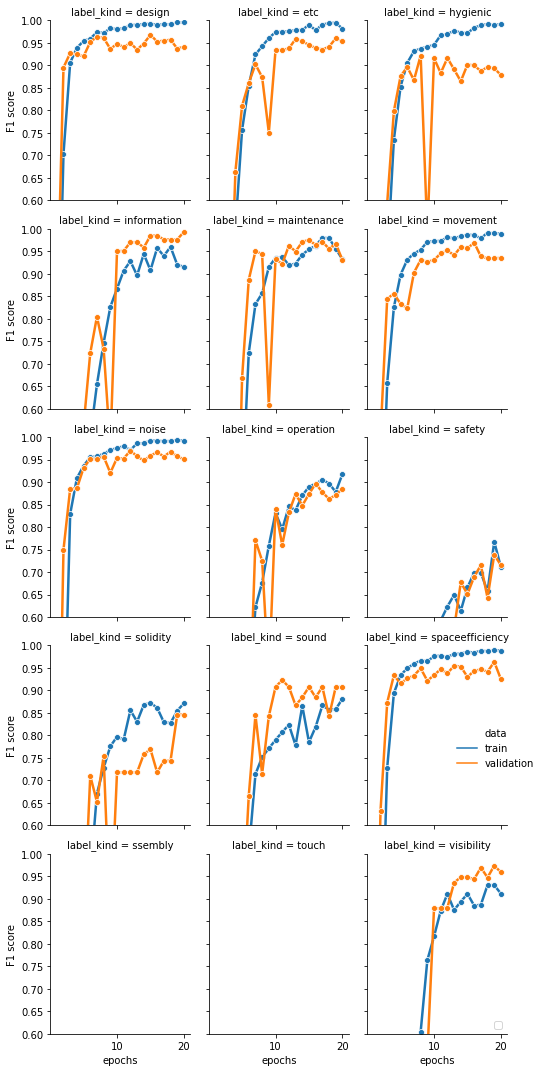

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

def history_to_value(history, n_label):
    history_out = pd.DataFrame(history.history)
    epochs = history_out.shape[0]
    history_out = history_out.drop('loss', axis=1).stack().reset_index()
    history_out['F1score'] = history_out['level_1'].apply(lambda x: 1 if x.split('_')[-1] =='F1score' else 0)
    history_out['label_kind'] = history_out['level_1'].apply(lambda x: x.split('_')[-2])
    history_out['data'] = history_out['level_1'].apply(lambda x: 'validation' if len(x.split('_')) == 3 else 'train')
    history_out = history_out[history_out['F1score'] == 1][[0, 'label_kind', 'data']].rename(columns={0:'values'}).reset_index(drop=True)
    history_out.sort_values(by=['label_kind', 'data'], inplace=True)
    history_out['epochs'] = list(range(1,epochs+1)) * n_label * 2
    return history_out

def plotDF(history, n_label):
    history_out = history_to_value(history, n_label)
    fig = sns.relplot(data=history_out, x="epochs", y="values", hue="data", col="label_kind", linewidth=2.5, kind='line', col_wrap=3,
                      marker='o', height=3, aspect=0.8)
    plt.legend(loc='lower right')
    leg = fig._legend
    leg.set_bbox_to_anchor([0.9,0.3])
    fig.set(ylim=(0.6, 1), ylabel='F1 score')

plotDF(history, n_label)

In [ ]:
best_model = load_model('best_model.h5', custom_objects = {'F1score':F1score})
best_model.evaluate(X_test, y_test_list, batch_size=60)

In [245]:
import matplotlib.pyplot as plt
def simpleaxis(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()
  ax.tick_params(axis='both', which='major', labelsize=10)

def predict_review(sentence, max_len=120):
    #Preprocess, Predict
    sentence = sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
    if sentence == '':
        return "리뷰 해석 불가."

    new = twi.morphs(sentence)
    new = [word for word in new if not word in stopwords]
    encoded = list(filter(lambda x: x>0, [tokenizer.word_index.get(i,0) for i in new])) #단어를 인덱스로 바꿈
    pad_new = [0]*(max_len-len(encoded)) + encoded    # 패딩
    scores = [i[0][0] for i in best_model.predict(np.array([pad_new]))] #이전에 학습한 모델로 예측한 후 결과 저장.

    #Visualize
    fig, ax = plt.subplots(1,1, figsize=(12,9))

    x, y = label_names[::-1], scores[::-1]
    colors = ['#E47F2D' if yy > 0.5 else '#747B86' for yy in y]  ##확률이 0.5 넘는 경우 주황색
    ax.barh(x, y, color=colors, height=0.5)
    ax.set_title("Category")
    ax.set_xlim(0,1)
    for i in range(15):
        ax.text(y[i]+0.01, x[i], '{:.2f}%'.format(y[i]*100), verticalalignment='center')
    simpleaxis(ax)

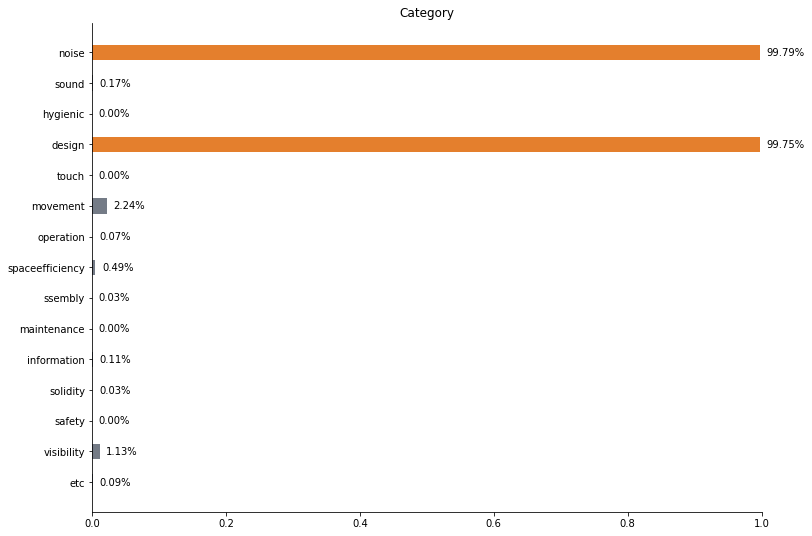

In [246]:
text = "디자인도 맘에들어요 소음도 작고 잘산것같아요"
predict_review(text)

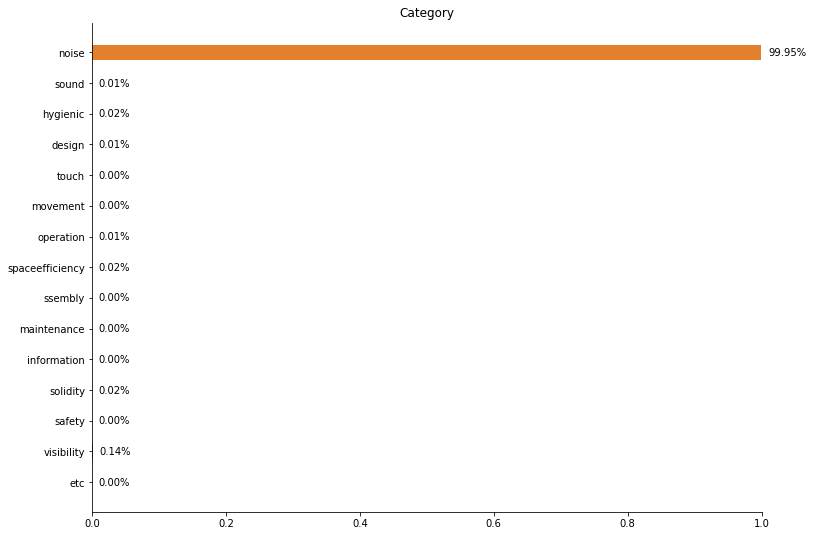

In [247]:
text = "소음이 커서 너무 별로예요"
predict_review(text)

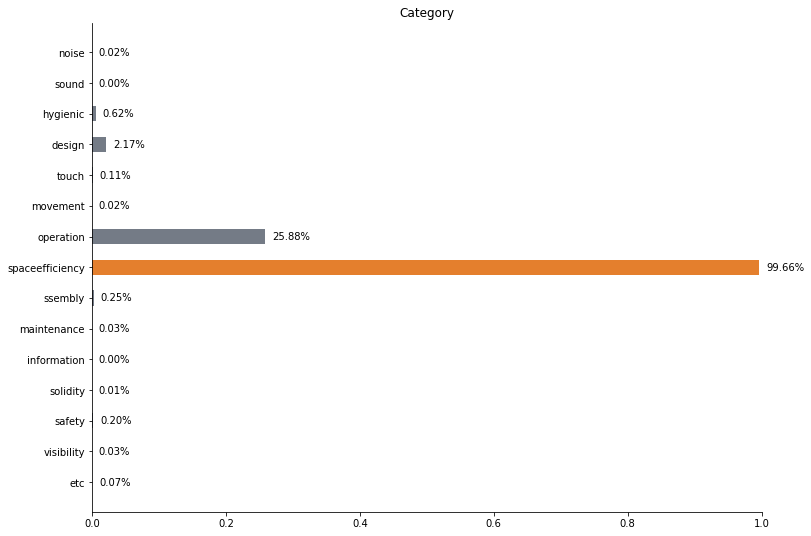

In [248]:
text = "공간 내부도 효율이 떨어지고 너무 시끄럽지만 예뻐요"
predict_review(text)

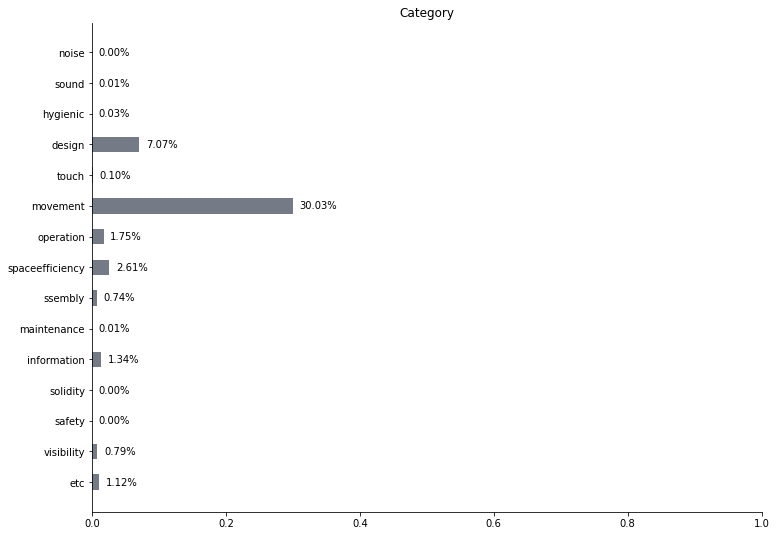

In [249]:
text = "조명이 어두워요"
predict_review(text)

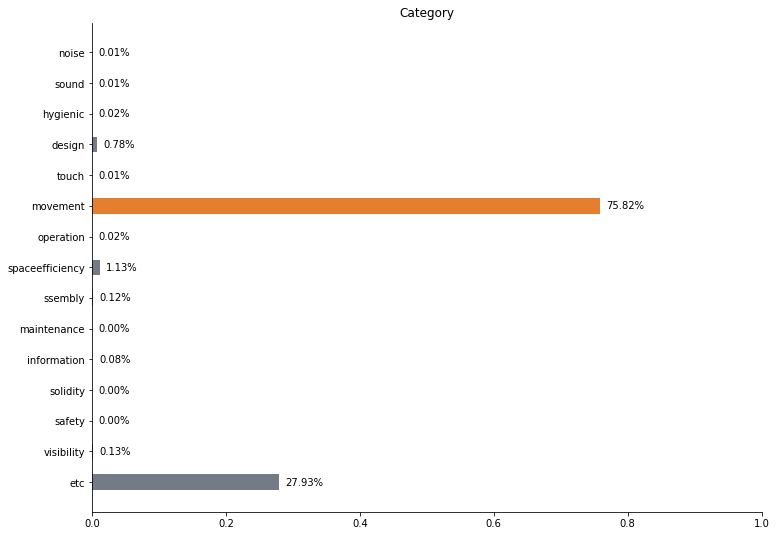

In [250]:
text = "냉장고문 열고 닫는게 편리해요"
predict_review(text)